In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm

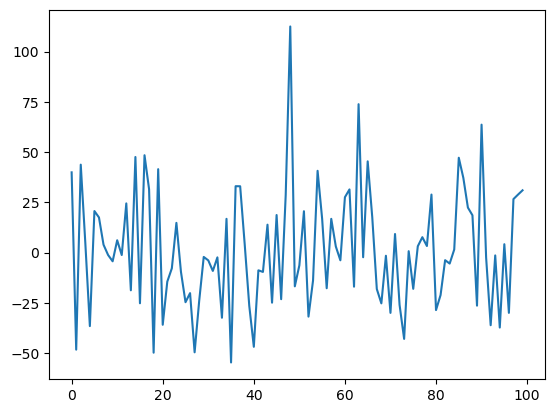

In [3]:
x = np.random.randn(100)*3
coeff = 10
intercept = 2
sigma = 2
y = x*coeff + sigma * np.random.normal(0, 1, size=(100,)) + intercept
plt.plot(y)

In [4]:
with pm.Model() as simple_model:
    x_data = pm.Data('x', x)
    coeff_model = pm.Normal('coeff', 0, 10)
    intercept_model = pm.Normal("intercept", 0, 2)
    mu = pm.Deterministic("mu", coeff_model*x_data + intercept_model)
    sigma_model = pm.HalfNormal('sigma', 2)

    obs = pm.Normal('obs', mu, sigma_model, observed=y)


In [5]:
with pm.Model() as over_constrained_model:
    x_data = pm.Data('x', x)
    coeff_model = pm.Normal('coeff', 0, 1)
    intercept_model = pm.Normal("intercept", 0, 2)
    mu = pm.Deterministic("mu", coeff_model*x_data + intercept_model)
    sigma_model = pm.HalfNormal('sigma', 2)

    obs = pm.Normal('obs', mu, sigma_model, observed=y)

In [24]:
with pm.Model() as under_constrained_model:
    x_data = pm.Data('x', x)
    coeff_model = pm.Normal('coeff', 0, 100)
    intercept_model = pm.Normal("intercept", 0, 100)
    mu = pm.Deterministic("mu", coeff_model*x_data + intercept_model)
    sigma_model = pm.HalfNormal('sigma', 20)

    obs = pm.Normal('obs', mu, sigma_model, observed=y)

In [10]:
with simple_model:
    prior_predictive_simple = pm.sample_prior_predictive()
prior_predictive_simple.add_groups({"posterior_predictive": prior_predictive_simple.prior_predictive})
prior_predictive_simple.add_groups({"posterior": prior_predictive_simple.prior})
with simple_model:
    pm.compute_log_likelihood(prior_predictive_simple)

Sampling: [coeff, intercept, obs, sigma]


In [11]:
with over_constrained_model:
    prior_predictive_over_constrained = pm.sample_prior_predictive()
prior_predictive_over_constrained.add_groups({"posterior_predictive": prior_predictive_over_constrained.prior_predictive})
prior_predictive_over_constrained.add_groups({"posterior": prior_predictive_over_constrained.prior})
with over_constrained_model:
    pm.compute_log_likelihood(prior_predictive_over_constrained)

Sampling: [coeff, intercept, obs, sigma]


In [27]:
with under_constrained_model:
    prior_predictive_under_constrained = pm.sample_prior_predictive()
prior_predictive_under_constrained.add_groups({"posterior_predictive": prior_predictive_under_constrained.prior_predictive})
prior_predictive_under_constrained.add_groups({"posterior": prior_predictive_under_constrained.prior})
with under_constrained_model:
    pm.compute_log_likelihood(prior_predictive_under_constrained)

Sampling: [coeff, intercept, obs, sigma]


Output()

d:\MattReda\miniforge\envs\foottraffic\Lib\site-packages\arviz\stats\stats.py:792: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.63 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
d:\MattReda\miniforge\envs\foottraffic\Lib\site-packages\arviz\stats\stats.py:792: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.63 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
d:\MattReda\miniforge\envs\foottraffic\Lib\site-pack

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

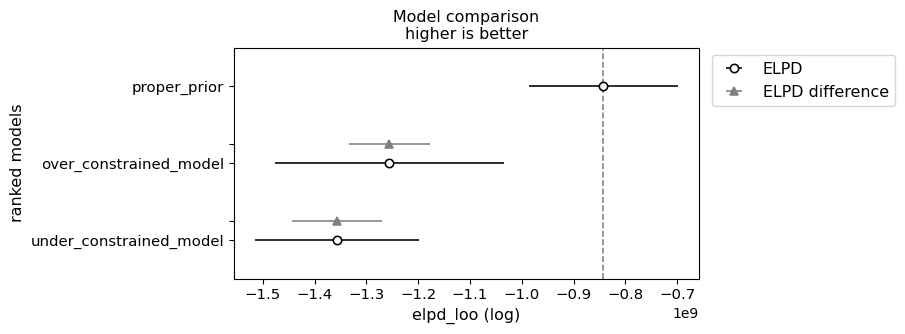

In [28]:
pm.plot_compare(pm.compare({"proper_prior": prior_predictive_simple, 
                            'over_constrained_model': prior_predictive_over_constrained,
                            'under_constrained_model': prior_predictive_under_constrained}))

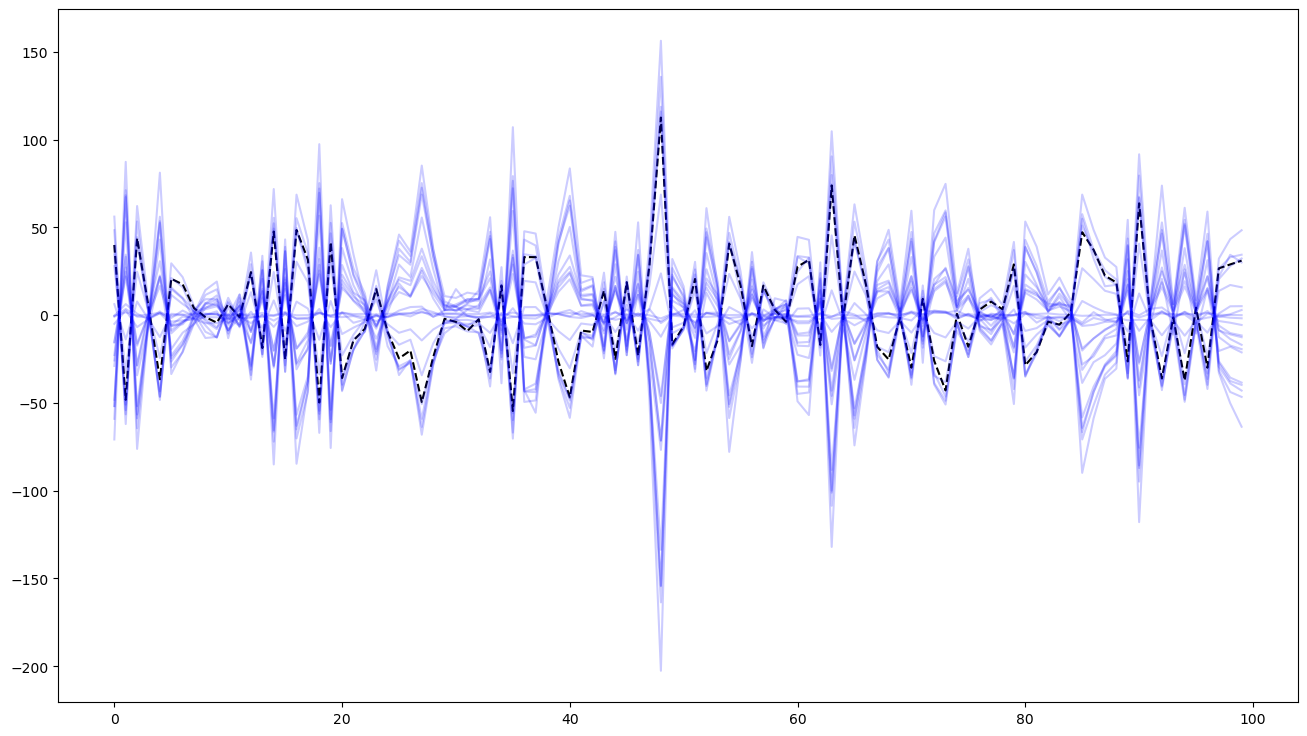

In [32]:
plt.figure(figsize=(16, 9))
plt.plot(y, ls='--', c='k')
plt.plot(prior_predictive_simple.prior_predictive.obs.sel(chain=0).values.T[:, :20], c='b', alpha=.2);

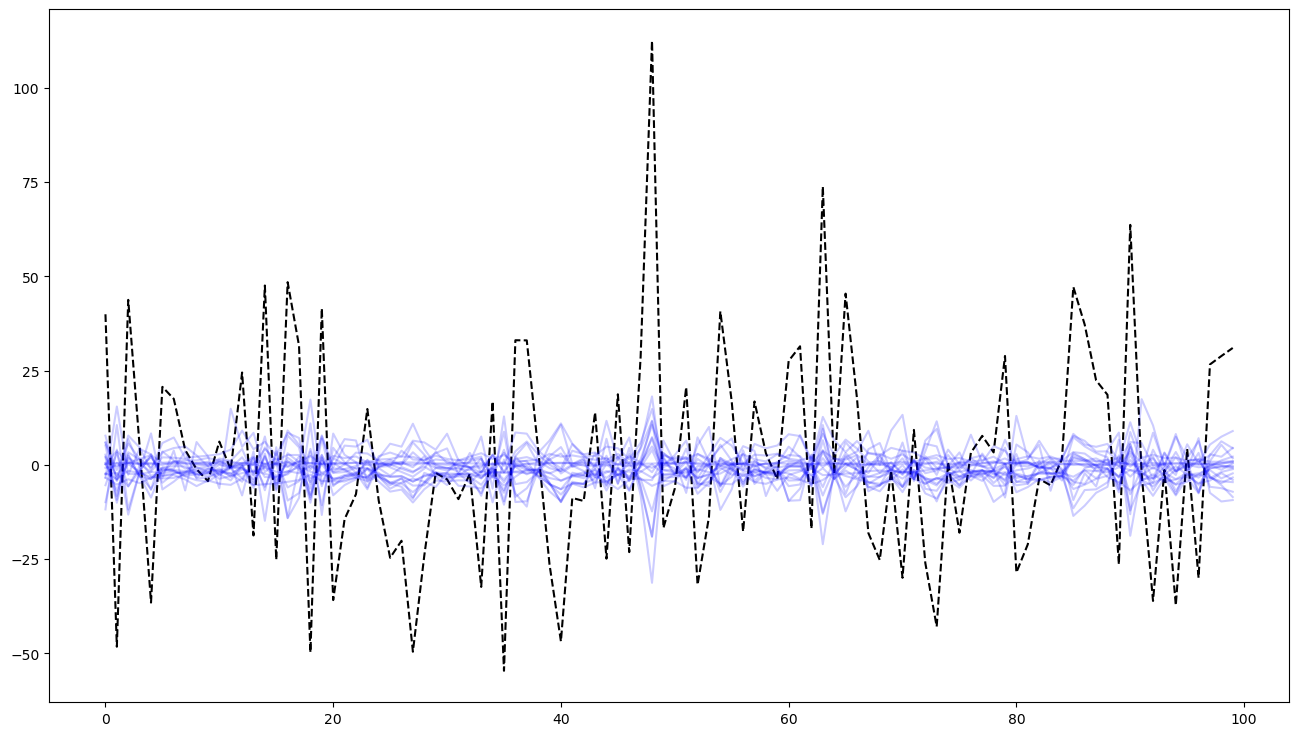

In [36]:
plt.figure(figsize=(16,9))
plt.plot(y, ls='--', c='k')
plt.plot(prior_predictive_over_constrained.prior_predictive.obs.sel(chain=0).values.T[:, :20], c='b', alpha=.2);

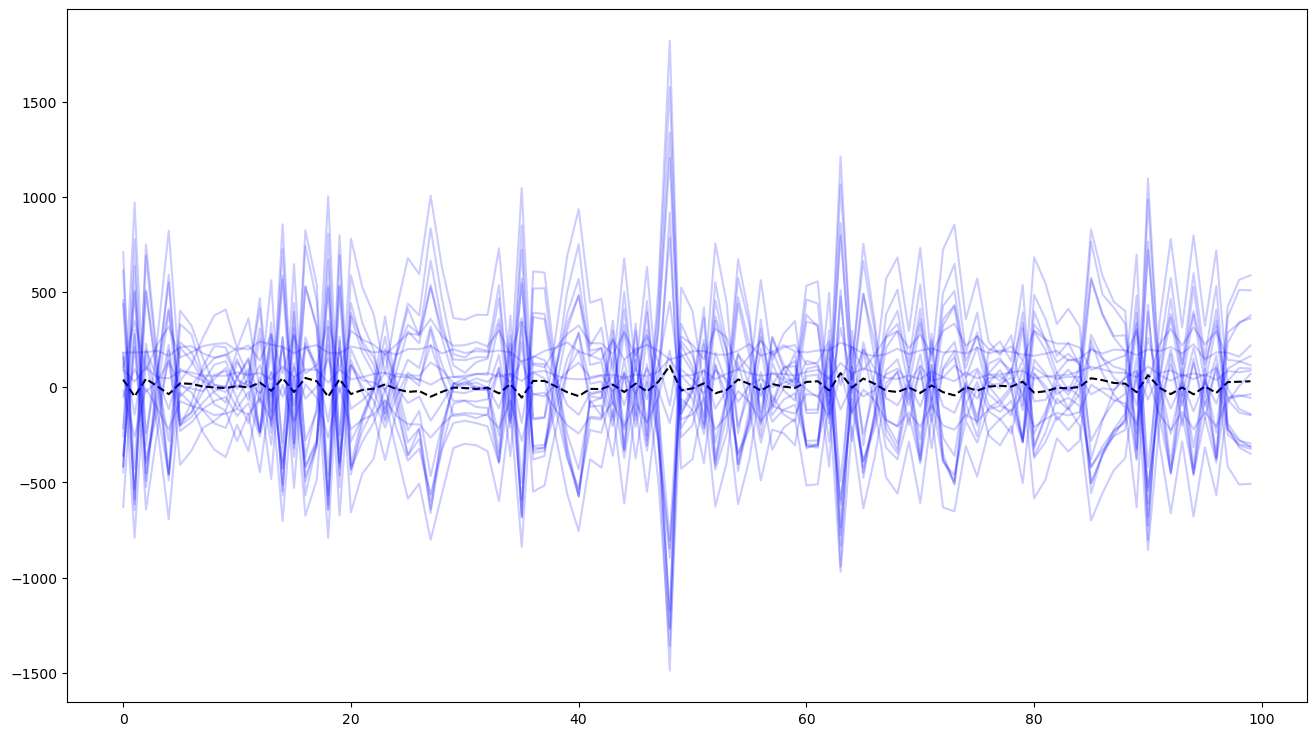

In [35]:
plt.figure(figsize=(16,9))
plt.plot(y, ls='--', c='k')
plt.plot(prior_predictive_under_constrained.prior_predictive.obs.sel(chain=0).values.T[:, :20], c='b', alpha=.2);

In [56]:
ft_data = pd.read_csv("first ft model/data/data.csv")
ft_data["Creative"] = "Total"

In [4]:
ft_data.to_csv("first ft model/data/data.csv", index=False)

In [5]:
mff = pd.read_csv("./with_re/data/data.csv")
mff.head()

,Creative,Geography,Period,VariableName,Product,Outlet,Campaign,VariableValue
0,Total,Beverly Hills,2021-04-05,Snow,Total,Total,Total,0.0
1,Total,Beverly Hills,2021-04-12,Snow,Total,Total,Total,0.0
2,Total,Beverly Hills,2021-04-19,Snow,Total,Total,Total,0.0
3,Total,Beverly Hills,2021-04-26,Snow,Total,Total,Total,0.0
4,Total,Beverly Hills,2021-05-03,Snow,Total,Total,Total,0.0


In [6]:
gt_data = pd.read_csv("Cartier_gt.csv", skiprows=2)
gt_data["Week"] = pd.to_datetime(gt_data["Week"]) + pd.DateOffset(days=1)
gt_data = gt_data.rename(columns={"Week": "Period", "cartier": "VariableValue"})
gt_data["VariableName"] = "GT_Cartier"
gt_data['VariableValue'] = gt_data["VariableValue"]/100.0
gt_data.head()

,Period,VariableValue,VariableName
0,2021-03-29,0.42,GT_Cartier
1,2021-04-05,0.43,GT_Cartier
2,2021-04-12,0.43,GT_Cartier
3,2021-04-19,0.45,GT_Cartier
4,2021-04-26,0.44,GT_Cartier


In [7]:
df_list = []
for geo in mff.Geography.unique():
    temp_df = gt_data.copy()
    temp_df["Geography"] = geo
    df_list.append(temp_df)
gt_mff = pd.concat(df_list)
gt_mff[["Product", "Creative", "Campaign", "Outlet"]] = "Total"
gt_mff.head()

,Period,VariableValue,VariableName,Geography,Product,Creative,Campaign,Outlet
0,2021-03-29,0.42,GT_Cartier,Beverly Hills,Total,Total,Total,Total
1,2021-04-05,0.43,GT_Cartier,Beverly Hills,Total,Total,Total,Total
2,2021-04-12,0.43,GT_Cartier,Beverly Hills,Total,Total,Total,Total
3,2021-04-19,0.45,GT_Cartier,Beverly Hills,Total,Total,Total,Total
4,2021-04-26,0.44,GT_Cartier,Beverly Hills,Total,Total,Total,Total


In [8]:
periods = pd.to_datetime(mff.Period.unique())
first_week, last_week = min(periods), max(periods)
gt_mff_filtered = gt_mff.query("Period <= @last_week").query("Period >= @first_week")

In [9]:
mff["Period"] = pd.to_datetime(mff["Period"])

In [10]:
full_mff_plus_gt = pd.concat([mff, gt_mff_filtered])

In [11]:
full_mff_plus_gt.to_csv("full_mff_and_gt.csv", index=False)

In [12]:
full_mff_plus_gt.to_csv("first ft model/data/data.csv", index=False)

In [10]:
from foottraffic.awb_model.transforms import s_origin

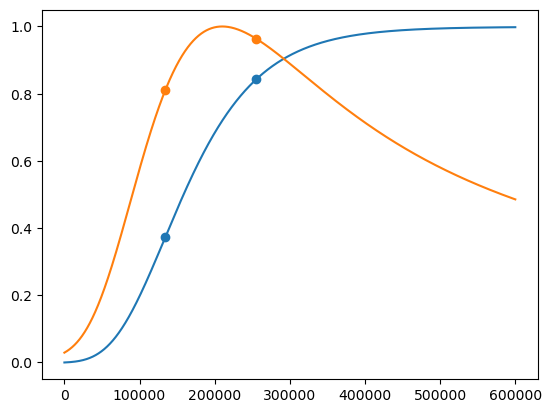

In [11]:
imps = np.linspace(0.0001, 6e5, 10_000)
alpha = .93
beta = 1000000
cpm = 2.00
cost = imps/1000*cpm
s_curve_imps = s_origin(imps, alpha, beta, index_to=5e5)
plt.plot(imps, s_curve_imps)
factor = max(s_curve_imps/cost)
plt.plot(imps, 1/factor*s_curve_imps/cost)
optimal_pt, sb_pt = 134_228, 255_034 

s_value_opt, s_value_sb = s_origin(optimal_pt, alpha, beta, index_to=5e5), s_origin(sb_pt, alpha, beta, index_to=5e5)
plt.scatter([optimal_pt, sb_pt], [s_value_opt, s_value_sb])
plt.scatter([optimal_pt, sb_pt], [1/factor*s_value_opt/(optimal_pt/1000*cpm), 1/factor*s_value_sb/(sb_pt/1000*cpm)])

In [12]:
from foottraffic.awb_model.models.variablemodels import SeasonVariableDetails
from foottraffic.awb_model.models.priormodel import SeasonPrior
from foottraffic.awb_model.models.dataloading import MFF

In [13]:
my_test_mff = MFF(data=full_mff_plus_gt)

In [43]:
season = SeasonVariableDetails(variable_type="season", variable_name="Yearly Season", random_coeff_dims=["Geography"], partial_pooling_sigma=0.5)
test = season._SeasonVariableDetails__fourier_components(my_test_mff)

In [44]:
import pymc as pm

In [45]:
with pm.Model(coords={
    "Period": my_test_mff.data.Period.unique(),
    "Geography": my_test_mff.data.Geography.unique(),
}) as m:
    #var = SeasonPrior(type="Season").build("Yearly_Season", 10)
    #var1 = season.build_coeff_prior()
    #variable = season.register_variable(my_test_mff)
    effect = season.get_contributions(my_test_mff) # pm.Deterministic("Yearly_Season_effect", var1@variable, dims=["Geography", "Period"])

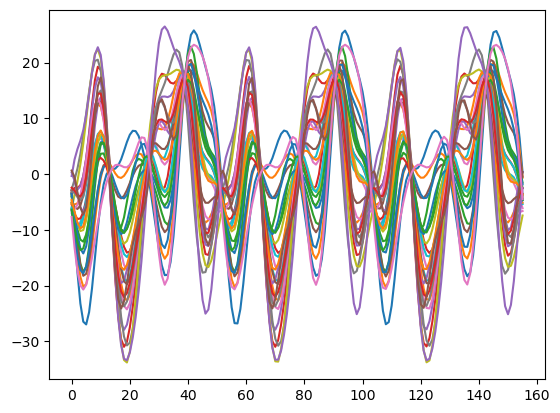

In [46]:

plt.plot(pm.draw(effect).T)

In [17]:
test.shape

(156, 10)

In [18]:
m.add_coord("Season", np.arange(10))

In [19]:
var.eval().shape

(27, 10)

In [20]:
var1.eval().shape

(27, 10)

In [23]:
variable.eval().shape

(10, 156)

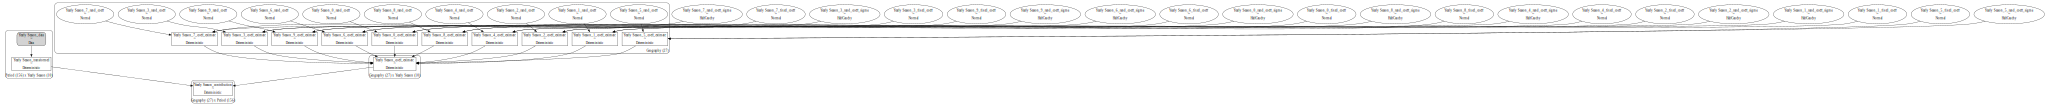

In [47]:
pm.model_to_graphviz(m)

In [29]:
test[None, ...].repeat(3, axis=0).shape

(3, 156, 10)

In [33]:
[len(dim) for dim_name, dim in m.coords.items() if dim_name in [""]

dict_items([('Period', (Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-12 00:00:00'), Timestamp('2021-04-19 00:00:00'), Timestamp('2021-04-26 00:00:00'), Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-05-17 00:00:00'), Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-07 00:00:00'), Timestamp('2021-06-14 00:00:00'), Timestamp('2021-06-21 00:00:00'), Timestamp('2021-06-28 00:00:00'), Timestamp('2021-07-05 00:00:00'), Timestamp('2021-07-12 00:00:00'), Timestamp('2021-07-19 00:00:00'), Timestamp('2021-07-26 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-08-09 00:00:00'), Timestamp('2021-08-16 00:00:00'), Timestamp('2021-08-23 00:00:00'), Timestamp('2021-08-30 00:00:00'), Timestamp('2021-09-06 00:00:00'), Timestamp('2021-09-13 00:00:00'), Timestamp('2021-09-20 00:00:00'), Timestamp('2021-09-27 00:00:00'), Timestamp('2021-10-04 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2021-10-18 00

In [49]:
import pytensor.tensor as pt

In [50]:
pt.concatenate?

Signature: pt.concatenate(tensor_list, axis=0)
Docstring:
Alias for `join`(axis, *tensor_list).

This function is similar to `join`, but uses the signature of
numpy's concatenate function.

Raises
------
TypeError
    The tensor_list must be a tuple or list.
File:      d:\mattreda\miniforge\envs\foottraffic\lib\site-packages\pytensor\tensor\basic.py
Type:      function